<a href="https://colab.research.google.com/github/kaitouz/OpenEdu/blob/main/Machine%20Learning%20%26%20Data%20Analysis/task07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INPUT**

In [1]:
# parameters for LinearSVC()
C = 0.94
random_state_SVC = 2

# parametes for train_test_split()
random_state_traintestsplit = 2
test_size = 0.25   # 75/25  =>  0.25


# Ques1, Ques2, Ques3
theta1 = 280
theta2 = 129
theta3 = 440

# Ques5, Ques6, Ques7, Ques8
file_name1 = "cat.1016.jpg"
file_name2 = "cat.1024.jpg"
file_name3 = "dog.1006.jpg"
file_name4 = "dog.1033.jpg"

# **Processing**

In [2]:
!unzip -o -q train_task.zip 
!unzip -o -q test_task.zip

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2, os

In [4]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [5]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)
  
le = LabelEncoder()
labels = le.fit_transform(labels)

In [6]:
trainData, testData, trainLabels, testLabels = train_test_split(np.array(data), labels, test_size=test_size, random_state=random_state_traintestsplit)

In [7]:
model = LinearSVC(random_state=random_state_SVC, C=C)
model.fit(trainData, trainLabels)

LinearSVC(C=0.94, random_state=2)

In [8]:
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')
f1score = f1_score(testLabels, predictions, average='macro')

In [9]:
def Predict_filepath(file_name):
  singleImage = cv2.imread("test/" + file_name)
  prediction = model.predict(extract_histogram(singleImage).reshape(1, -1))
  display(Image(filename="test/" + file_name))
  print(f"Ans = {prediction[0]}")


# **Result**

In [10]:
#Ans1
print(f"Theta_{theta1} = {model.coef_[0][theta1]}")
#Ans2
print(f"Theta_{theta2} = {model.coef_[0][theta2]}")
#Ans3
print(f"Theta_{theta3} = {model.coef_[0][theta3]}")
#Ans4
print(f"F1 = {f1score}")

Theta_280 = 0.20317455399439197
Theta_129 = 0.00861651551448296
Theta_440 = 0.0
F1 = 0.591919191919192


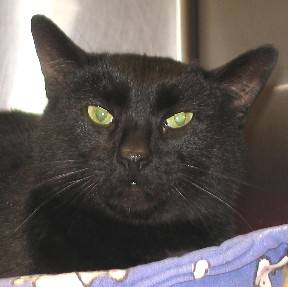

Ans = 0


In [11]:
#Ans5
Predict_filepath(file_name1)

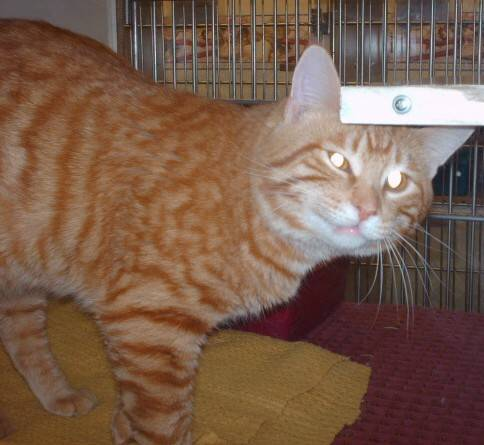

Ans = 1


In [12]:
#Ans6
Predict_filepath(file_name2)

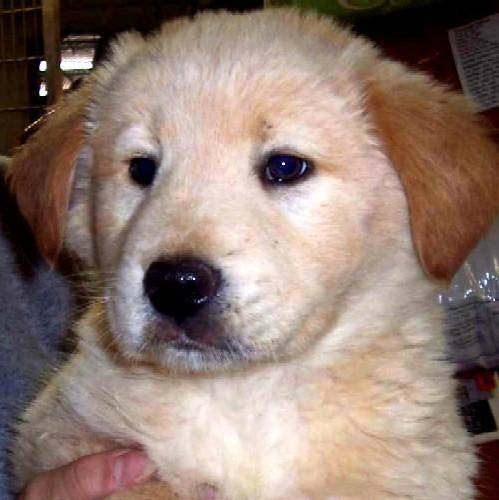

Ans = 1


In [13]:
#Ans7
Predict_filepath(file_name3)

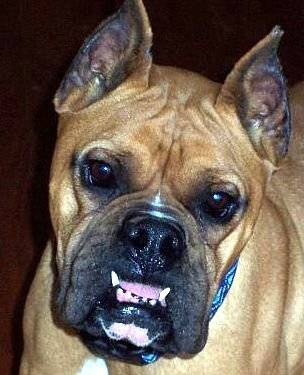

Ans = 0


In [14]:
#Ans8
Predict_filepath(file_name4)